In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("bikes_rent.csv")
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


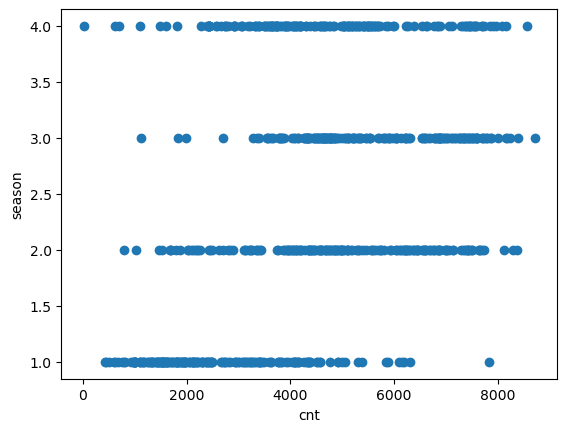

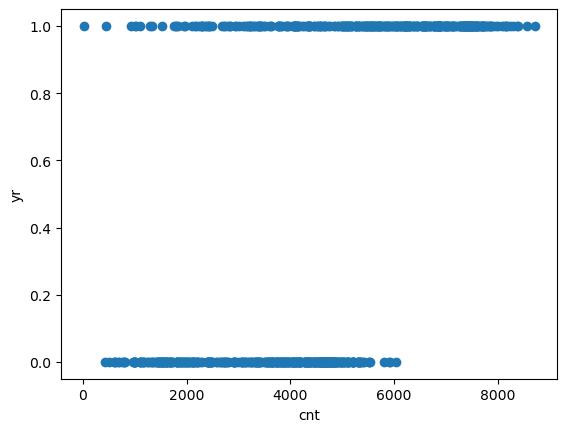

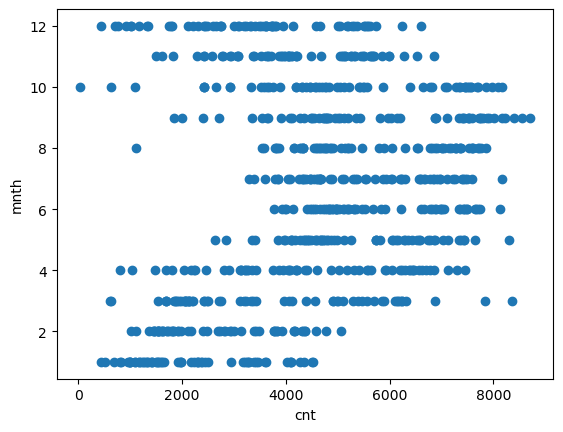

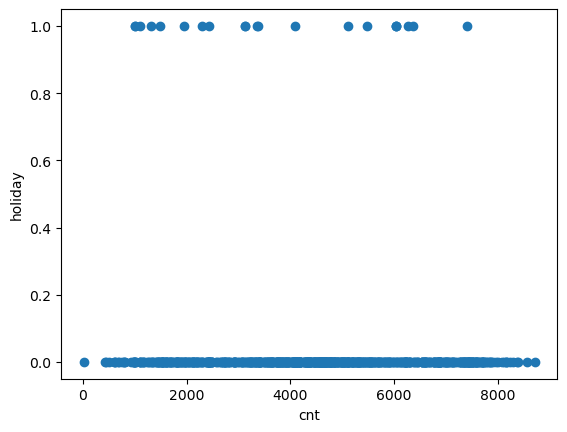

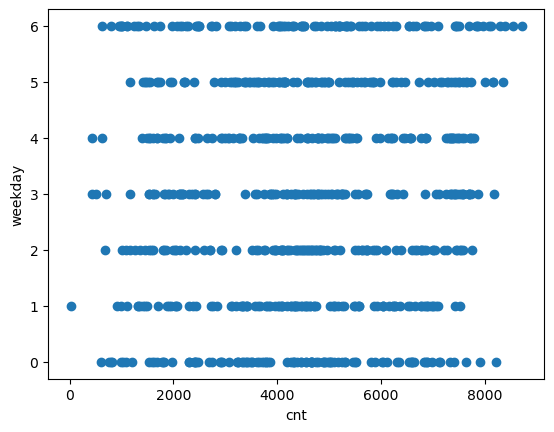

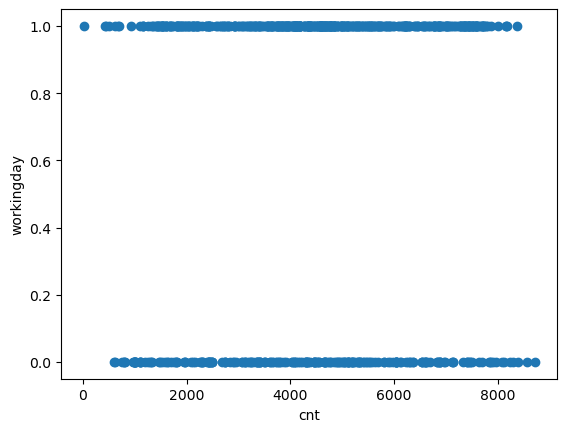

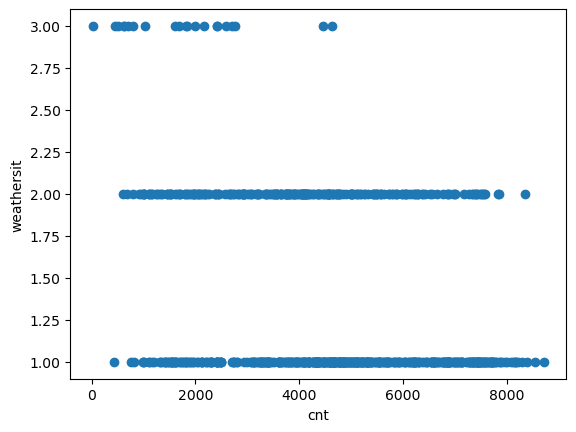

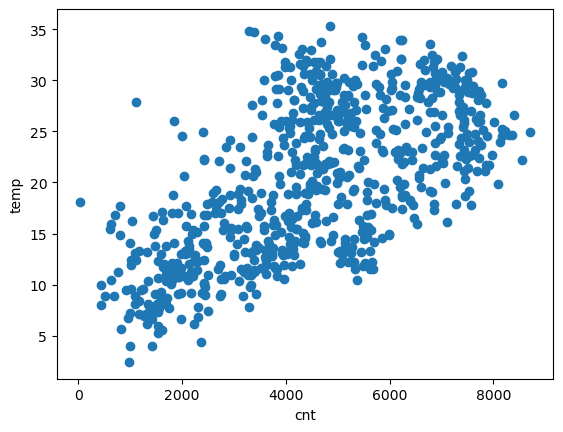

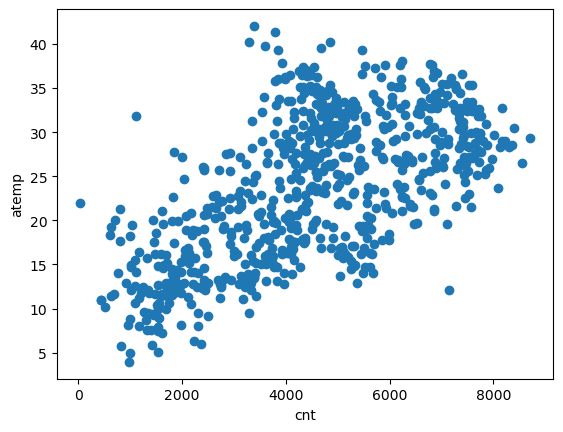

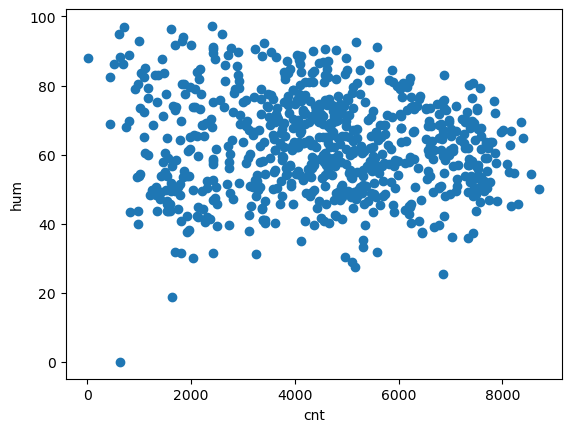

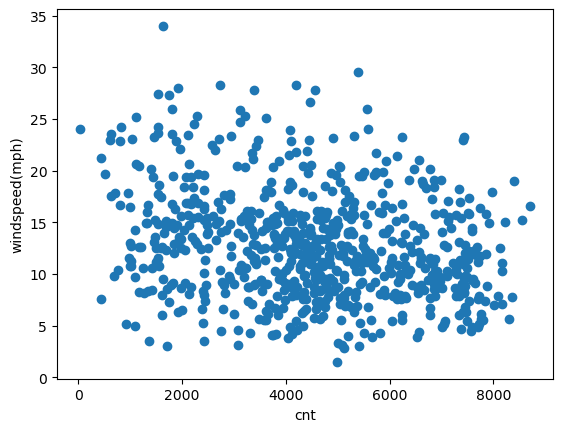

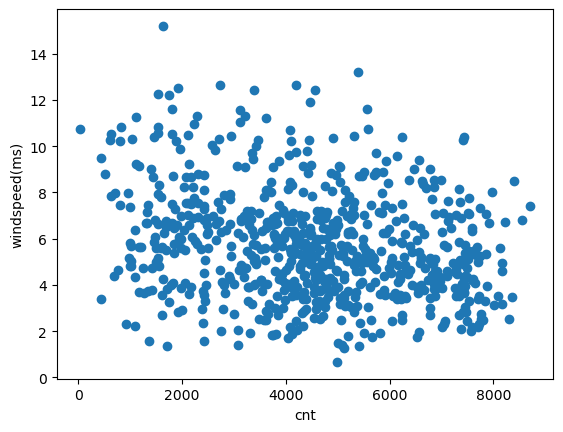

In [3]:
plt.scatter(df['cnt'], df['season'])
plt.xlabel('cnt')
plt.ylabel('season')
plt.show()

plt.scatter(df['cnt'], df['yr'])
plt.xlabel('cnt')
plt.ylabel('yr')
plt.show()

plt.scatter(df['cnt'], df['mnth'])
plt.xlabel('cnt')
plt.ylabel('mnth')
plt.show()

plt.scatter(df['cnt'], df['holiday'])
plt.xlabel('cnt')
plt.ylabel('holiday')
plt.show()

plt.scatter(df['cnt'], df['weekday'])
plt.xlabel('cnt')
plt.ylabel('weekday')
plt.show()

plt.scatter(df['cnt'], df['workingday'])
plt.xlabel('cnt')
plt.ylabel('workingday')
plt.show()

plt.scatter(df['cnt'], df['weathersit'])
plt.xlabel('cnt')
plt.ylabel('weathersit')
plt.show()

plt.scatter(df['cnt'], df['temp'])
plt.xlabel('cnt')
plt.ylabel('temp')
plt.show()

plt.scatter(df['cnt'], df['atemp'])
plt.xlabel('cnt')
plt.ylabel('atemp')
plt.show()

plt.scatter(df['cnt'], df['hum'])
plt.xlabel('cnt')
plt.ylabel('hum')
plt.show()

plt.scatter(df['cnt'], df['windspeed(mph)'])
plt.xlabel('cnt')
plt.ylabel('windspeed(mph)')
plt.show()

plt.scatter(df['cnt'], df['windspeed(ms)'])
plt.xlabel('cnt')
plt.ylabel('windspeed(ms)')
plt.show()

In [4]:
correlations = df.corrwith(df['cnt'])
correlations

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
cnt               1.000000
dtype: float64

In [5]:
correlation_matrix = df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']].corr()
print(correlation_matrix)

                    temp     atemp       hum  windspeed(mph)  windspeed(ms)  \
temp            1.000000  0.991702  0.126963       -0.157944      -0.157944   
atemp           0.991702  1.000000  0.139988       -0.183643      -0.183643   
hum             0.126963  0.139988  1.000000       -0.248489      -0.248489   
windspeed(mph) -0.157944 -0.183643 -0.248489        1.000000       1.000000   
windspeed(ms)  -0.157944 -0.183643 -0.248489        1.000000       1.000000   
cnt             0.627494  0.631066 -0.100659       -0.234545      -0.234545   

                     cnt  
temp            0.627494  
atemp           0.631066  
hum            -0.100659  
windspeed(mph) -0.234545  
windspeed(ms)  -0.234545  
cnt             1.000000  


In [6]:
df.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

In [7]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [8]:
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression().fit(X,y)

feature_weights = zip(df.columns, reg.coef_)
for feature, weight in feature_weights:
    print(feature, weight)

season 570.8674889862766
yr 1021.9645159780381
mnth -141.30356420478935
holiday -86.75926356396214
weekday 137.22578660883255
workingday 56.3913311383312
weathersit -330.2297697024501
temp 367.4787098469888
atemp 585.5515377590608
hum -145.61340408928012
windspeed(mph) 12456110242934.967
windspeed(ms) -12456110243133.432


In [11]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X,y)
feature_weights = zip(df.columns, lasso.coef_)
for feature, weight in feature_weights:
    print(feature, weight)

season 560.2416160308857
yr 1019.4634940657195
mnth -128.73062703678693
holiday -86.15278133371105
weekday 137.34789390496329
workingday 55.21237064135678
weathersit -332.3698569623487
temp 376.36323620969864
atemp 576.530793504551
hum -144.12915500348578
windspeed(mph) -197.1396894024843
windspeed(ms) -2.805139889577359e-08


In [12]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X,y)
feature_weights = zip(df.columns, ridge.coef_)
for feature, weight in feature_weights:
    print(feature, weight)

season 563.0645722520163
yr 1018.948378787529
mnth -131.87332028247602
holiday -86.74609799709256
weekday 138.0051111787189
workingday 55.903110375064436
weathersit -332.34978849907293
temp 386.4578891919372
atemp 566.3470470600387
hum -145.07132729867263
windspeed(mph) -99.25944108187153
windspeed(ms) -99.25944115426178


In [13]:
alphas = np.arange(1, 500, 50)

coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X,y)
    coefs_lasso.append(lasso.coef_)
    
    ridge = Ridge(alpha=alpha)
    ridge.fit(X,y)
    coefs_ridge.append(ridge.coef_)

coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

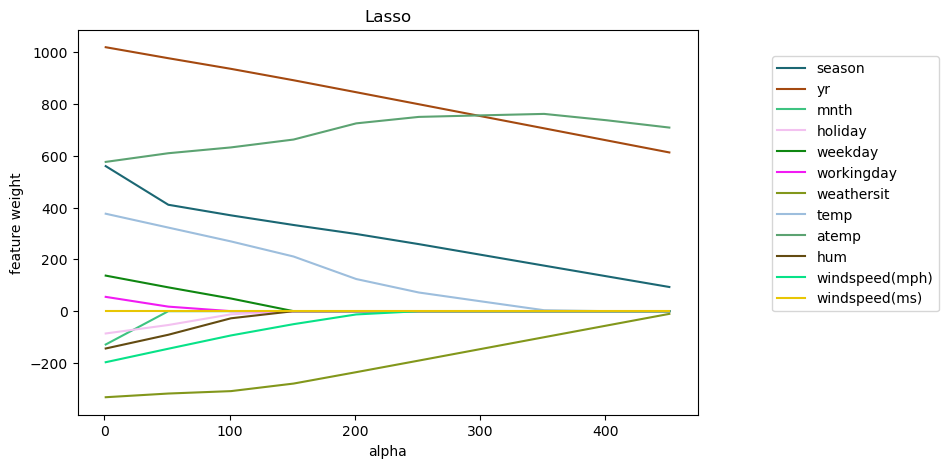

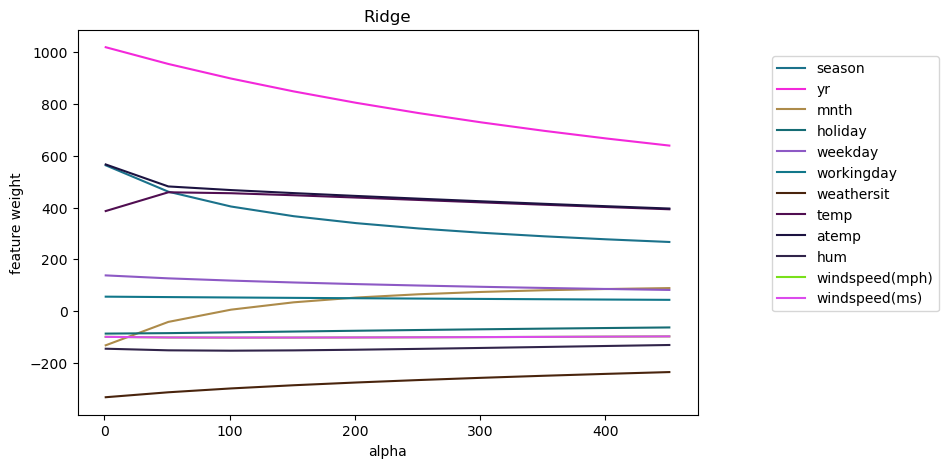

In [14]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

In [15]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = list(map(lambda e: e[0], data))
    y = list(map(lambda e: e[1], data))
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

Selected alpha: 6
Feature coefficients:
season : 532.0189828413535
yr : 1015.0602226430597
mnth : -100.03952614356628
holiday : -83.2939598752991
weekday : 132.50446549095793
workingday : 51.55708561407379
weathersit : -330.5598567399813
temp : 370.6798550300328
atemp : 581.3969310654992
hum : -140.00740550068875
windspeed(mph) : -191.7714084713494
windspeed(ms) : -2.685570636704926e-08


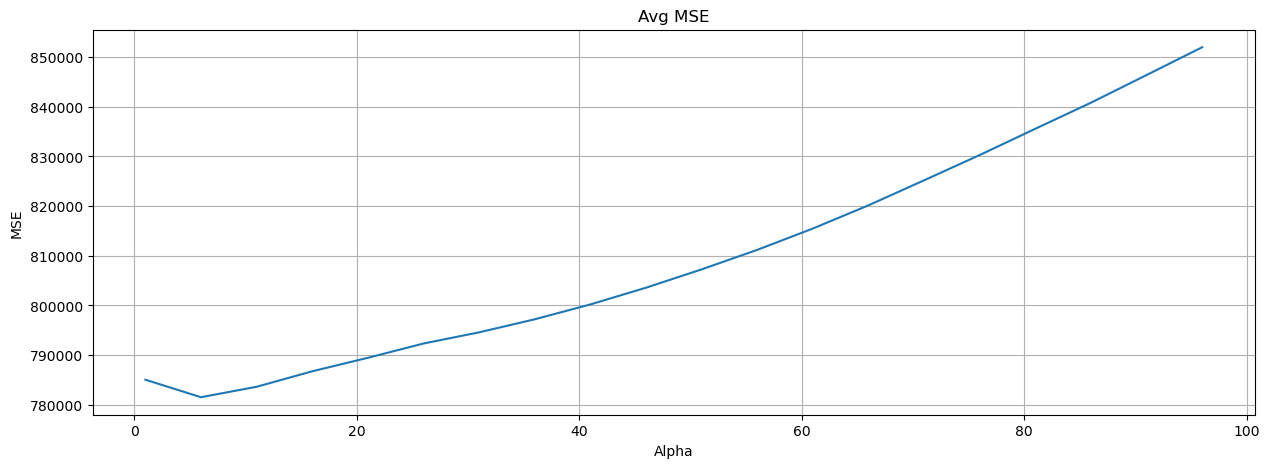

In [16]:
from sklearn.linear_model import LassoCV

alphas = np.arange(1, 100, 5)

regressor = LassoCV(alphas=alphas, cv=3)
regressor.fit(X, y)

print("Selected alpha:", regressor.alpha_)
print("Feature coefficients:")
for feature, coef in zip(df.columns, regressor.coef_):
    print(feature, ":", coef)

mse_data = list(zip(regressor.alphas_, regressor.mse_path_.mean(axis=1)))
create_plot(mse_data, "Avg MSE", "Alpha", "MSE")





Alphas with minimum MSE:
Alpha = 6, MSE = 733725.7604052246
Alpha = 1, MSE = 799433.1673691702
Alpha = 51, MSE = 796979.8955193636


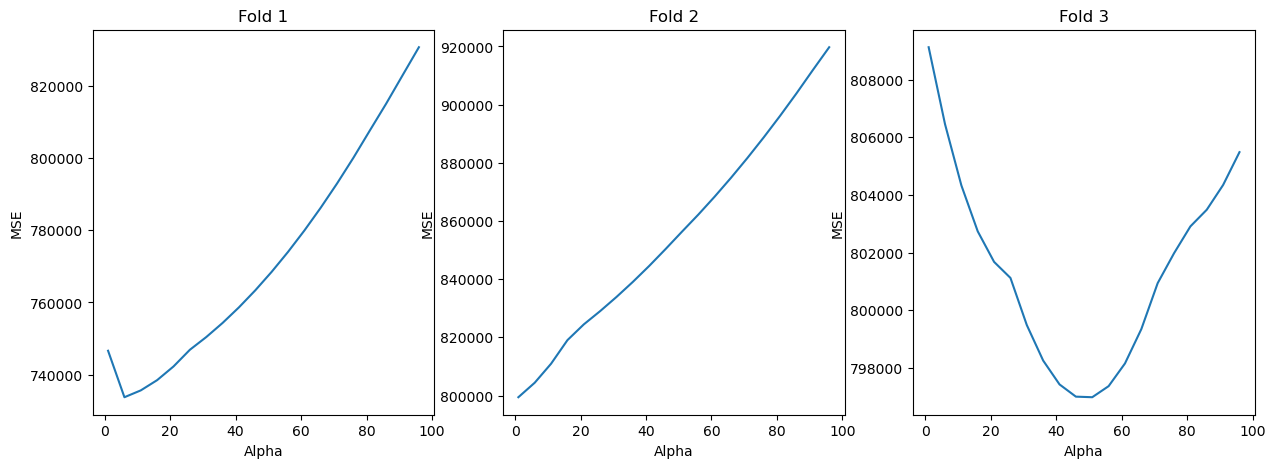

In [25]:
min_mse_indices = np.argmin(regressor.mse_path_, axis=0)


print("Alphas with minimum MSE:")
for i, idx in enumerate(min_mse_indices):
    alpha = regressor.alphas_[idx]
    mse = regressor.mse_path_[idx, i]
    print(f"Alpha = {alpha}, MSE = {mse}")
    

    
    
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axs):
    ax.plot(regressor.alphas_, regressor.mse_path_[:, i])
    ax.set_xlabel("Alpha")
    ax.set_ylabel("MSE")
    ax.set_title(f"Fold {i+1}")

plt.show()


array([ 5.32018983e+02,  1.01506022e+03, -1.00039526e+02, -8.32939599e+01,
        1.32504465e+02,  5.15570856e+01, -3.30559857e+02,  3.70679855e+02,
        5.81396931e+02, -1.40007406e+02, -1.91771408e+02, -2.68557064e-08])

Top 4 features with highest positive coefficients:  dict_keys(['yr', 'atemp', 'season', 'temp'])


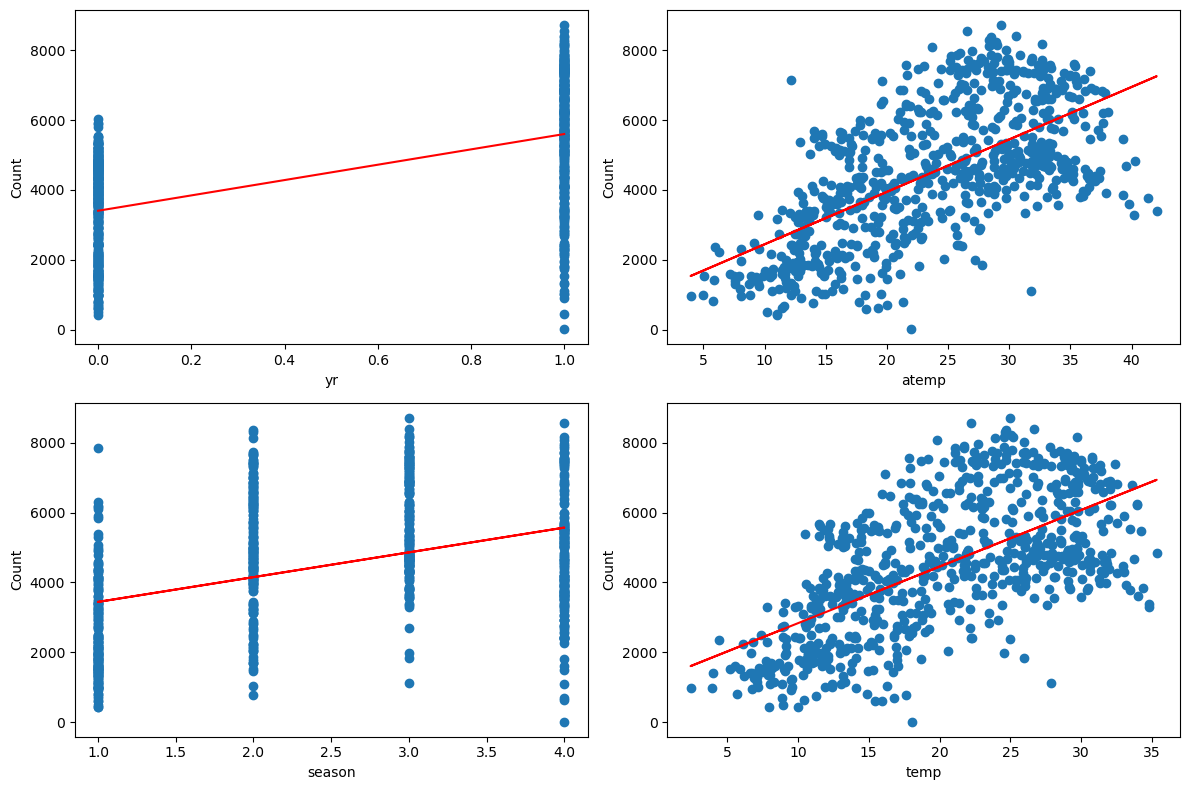

In [47]:
coef_dict = {}
for coef, feat in zip(regressor.coef_, df.columns):
    coef_dict[feat] = coef

top_positive_coef = dict(sorted(coef_dict.items(), key=lambda x: -x[1])[:4])
print("Top 4 features with highest positive coefficients: ", top_positive_coef.keys())

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, feature in enumerate(top_positive_coef):
    ax = axes[i // 2, i % 2]
    ax.scatter(df[feature], df['cnt'])
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')


    coeffs = np.polyfit(df[feature], df['cnt'], 1)
    line = np.polyval(coeffs, df[feature])
    ax.plot(df[feature], line, color='red')

plt.tight_layout()
plt.show()


Top 3 features with highest negative coefficients: Index(['weathersit', 'windspeed(mph)', 'hum'], dtype='object')


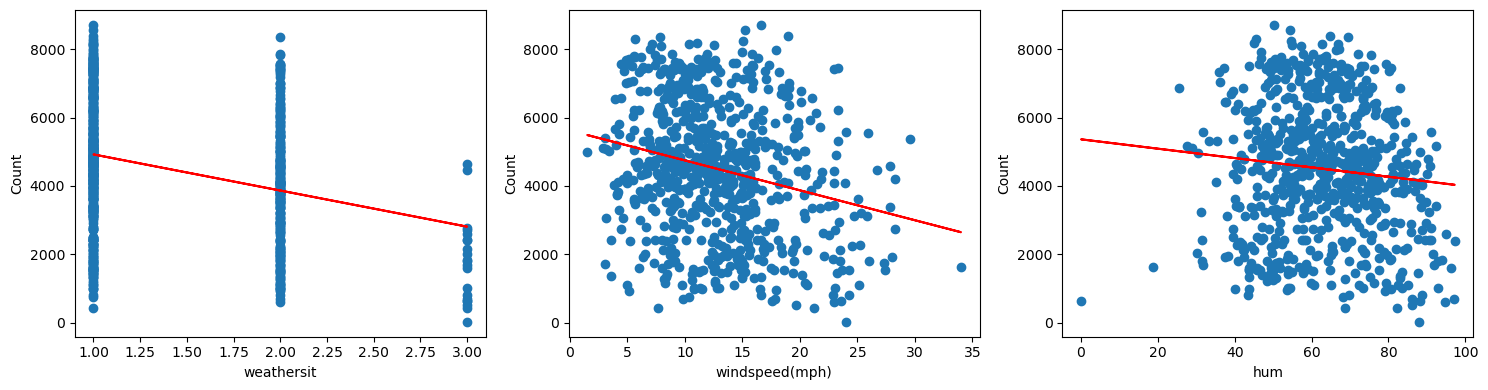

In [50]:
coef_indices = np.argsort(regressor.coef_)
top_negative_features = df.columns[coef_indices][:3]

print("Top 3 features with highest negative coefficients:", top_negative_features)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

for i, feature in enumerate(top_negative_features):
    ax = axes[i]
    ax.scatter(df[feature], df['cnt'])
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

    coeffs = np.polyfit(df[feature], df['cnt'], 1)
    line = np.polyval(coeffs, df[feature])
    ax.plot(df[feature], line, color='red')

plt.tight_layout()
plt.show()

In [53]:
features_near_zero = {feat: coef for feat, coef in zip(df.columns, regressor.coef_) if abs(coef) < 1e-3}
print("Features with coefficients near zero:", features_near_zero.keys())

Features with coefficients near zero: dict_keys(['windspeed(ms)'])
